<a href="https://colab.research.google.com/github/martuscellifaria/Coursera/blob/main/K_Means_Cluster_Smokers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import pandas.util.testing as tm
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Course ML/tree_addhealth.csv")

In [4]:
data.columns = map(str.upper, data.columns)

In [5]:
data_clean = data.dropna()

In [6]:
cluster=data_clean[['ALCEVR1','MAREVER1','ALCPROBS1','DEVIANT1','VIOL1',
'DEP1','ESTEEM1','SCHCONN1','PARACTV', 'PARPRES','FAMCONCT']]
cluster.describe()

,ALCEVR1,MAREVER1,ALCPROBS1,DEVIANT1,VIOL1,DEP1,ESTEEM1,SCHCONN1,PARACTV,PARPRES,FAMCONCT
count,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000
mean,0.527432,0.241967,0.369180,2.645027,1.618579,8.537049,40.952131,28.360656,6.290710,13.398033,22.570557
std,0.499302,0.428321,0.894947,3.520554,2.593230,6.571052,5.381439,5.156385,3.360219,2.085837,2.614754
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,6.000000,0.000000,3.000000,6.300000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,38.000000,25.000000,4.000000,12.000000,21.700000
50%,1.000000,0.000000,0.000000,1.000000,0.000000,7.000000,40.000000,29.000000,6.000000,14.000000,23.700000
75%,1.000000,0.000000,0.000000,4.000000,2.000000,12.000000,45.000000,32.000000,9.000000,15.000000,24.300000
max,1.000000,1.000000,6.000000,27.000000,19.000000,48.000000,50.000000,38.000000,18.000000,15.000000,25.000000


In [7]:
clustervar=cluster.copy()
clustervar['ALCEVR1']=preprocessing.scale(clustervar['ALCEVR1'].astype('float64'))
clustervar['ALCPROBS1']=preprocessing.scale(clustervar['ALCPROBS1'].astype('float64'))
clustervar['MAREVER1']=preprocessing.scale(clustervar['MAREVER1'].astype('float64'))
clustervar['DEP1']=preprocessing.scale(clustervar['DEP1'].astype('float64'))
clustervar['ESTEEM1']=preprocessing.scale(clustervar['ESTEEM1'].astype('float64'))
clustervar['VIOL1']=preprocessing.scale(clustervar['VIOL1'].astype('float64'))
clustervar['DEVIANT1']=preprocessing.scale(clustervar['DEVIANT1'].astype('float64'))
clustervar['FAMCONCT']=preprocessing.scale(clustervar['FAMCONCT'].astype('float64'))
clustervar['SCHCONN1']=preprocessing.scale(clustervar['SCHCONN1'].astype('float64'))
clustervar['PARACTV']=preprocessing.scale(clustervar['PARACTV'].astype('float64'))
clustervar['PARPRES']=preprocessing.scale(clustervar['PARPRES'].astype('float64'))

In [8]:
clus_train, clus_test = train_test_split(clustervar, test_size=.3, random_state=123)

In [9]:
from scipy.spatial.distance import cdist
clusters=range(1,10)
meandist=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clus_train)
    clusassign=model.predict(clus_train)
    meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1)) 
    / clus_train.shape[0])

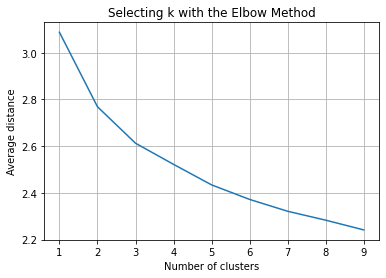

In [11]:
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')
plt.grid(which='major')
plt.grid(which='minor')

In [12]:
model3=KMeans(n_clusters=3)
model3.fit(clus_train)
clusassign=model3.predict(clus_train)

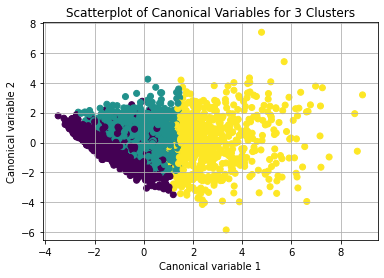

In [14]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(clus_train)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model3.labels_,)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.grid(which='major')
plt.grid(which='minor')
plt.title('Scatterplot of Canonical Variables for 3 Clusters')
plt.show()

In [18]:
# cluster training data to merge with the cluster assignment variable
clus_train.reset_index(level=0, inplace=True)
# create a list that has the new index variable
cluslist=list(clus_train['index'])
# create a list of cluster assignments
labels=list(model3.labels_)
# combine index variable list with cluster assignment list into a dictionary
newlist=dict(zip(cluslist, labels))
newlist

{2559: 0,
 820: 0,
 1683: 1,
 5492: 1,
 4763: 0,
 5622: 0,
 808: 2,
 5071: 2,
 5522: 1,
 3042: 1,
 1070: 1,
 3187: 0,
 5925: 2,
 895: 2,
 2055: 2,
 4099: 1,
 3413: 1,
 2738: 0,
 1007: 0,
 2976: 0,
 4556: 0,
 3610: 1,
 3194: 0,
 990: 0,
 2577: 2,
 3984: 1,
 5263: 1,
 5200: 0,
 4270: 1,
 4901: 0,
 1676: 2,
 3757: 2,
 3734: 2,
 5914: 2,
 677: 0,
 3950: 2,
 91: 2,
 1446: 0,
 5652: 1,
 2514: 1,
 5114: 1,
 4737: 0,
 1194: 1,
 301: 0,
 80: 0,
 4102: 1,
 2275: 0,
 1461: 2,
 1601: 0,
 3310: 2,
 5900: 0,
 442: 0,
 3685: 1,
 5432: 1,
 5159: 0,
 4156: 2,
 3383: 2,
 762: 0,
 1353: 2,
 3596: 2,
 1854: 1,
 4692: 2,
 1034: 2,
 2761: 2,
 5536: 2,
 4889: 2,
 2950: 1,
 1229: 1,
 2671: 0,
 6447: 1,
 4119: 0,
 2815: 1,
 141: 1,
 2171: 0,
 4605: 1,
 607: 0,
 1273: 2,
 3981: 2,
 1903: 0,
 4414: 2,
 2843: 0,
 4015: 1,
 4606: 0,
 3619: 1,
 5575: 0,
 1343: 0,
 3958: 1,
 3899: 0,
 3204: 0,
 4757: 2,
 5503: 0,
 1297: 0,
 636: 2,
 3852: 0,
 5399: 1,
 4753: 1,
 4814: 1,
 3325: 0,
 1931: 1,
 36: 1,
 3335: 1,
 2542: 

In [20]:
# convert newlist dictionary to a dataframe
newclus=DataFrame.from_dict(newlist, orient='index')
newclus.columns = ['cluster']
newclus

,cluster
2559,0
820,0
1683,1
5492,1
4763,0
...,...
2287,0
5771,1
1941,0
4922,0


In [21]:
# create a unique identifier variable from the index for the 
# cluster assignment dataframe 
# to merge with cluster training data
newclus.reset_index(level=0, inplace=True)
# merge the cluster assignment dataframe with the cluster training variable dataframe
# by the index variable
merged_train=pd.merge(clus_train, newclus, on='index')
merged_train.head(n=100)
# cluster frequencies
merged_train.cluster.value_counts()

0    1420
1    1113
2     669
Name: cluster, dtype: int64

In [22]:
clustergrp = merged_train.groupby('cluster').mean()
print ("Clustering variable means by cluster")
print(clustergrp)

Clustering variable means by cluster
             level_0        index   ALCEVR1  ...   PARACTV   PARPRES  FAMCONCT
cluster                                      ...                              
0        1576.565493  3239.829577 -1.056455  ...  0.091216  0.156604  0.298288
1        1618.805930  3329.631626  0.946562  ...  0.152276  0.104248  0.227935
2        1620.847534  3310.964126  0.659134  ... -0.415299 -0.486130 -0.966053

[3 rows x 13 columns]


In [23]:
# first have to merge GPA with clustering variables and cluster assignment data 
gpa_data=data_clean['GPA1']
# split GPA data into train and test sets
gpa_train, gpa_test = train_test_split(gpa_data, test_size=.3, random_state=123)
gpa_train1=pd.DataFrame(gpa_train)
gpa_train1.reset_index(level=0, inplace=True)
merged_train_all=pd.merge(gpa_train1, merged_train, on='index')
sub1 = merged_train_all[['GPA1', 'cluster']].dropna()

In [26]:
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 

gpamod = smf.ols(formula='GPA1 ~ C(cluster)', data=sub1).fit()
print (gpamod.summary())

print ('means for GPA by cluster')
m1= sub1.groupby('cluster').mean()
print (m1)

print ('standard deviations for GPA by cluster')
m2= sub1.groupby('cluster').std()
print (m2)

mc1 = multi.MultiComparison(sub1['GPA1'], sub1['cluster'])
res1 = mc1.tukeyhsd()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                   GPA1   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     134.4
Date:                Wed, 21 Oct 2020   Prob (F-statistic):           9.21e-57
Time:                        18:00:50   Log-Likelihood:                -3598.3
No. Observations:                3202   AIC:                             7203.
Df Residuals:                    3199   BIC:                             7221.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.9945      0.020    1